Enunciado del Problema:
Usted ha sido contratado en el ministerio de educación para analizar los resultados de una nueva 
metodología de educación implementada en el colegio Graham Parker (GP), versus el colegio
Marteen Sheen (MS), en donde no fue aplicada la metodología.
Ambos colegios han tenido históricamente desempeños similares en las notas de sus alumnos. A 
continuación, se presenta un extracto del set de datos obtenido después de haber aplicado la 
nueva metodología:

En base a este set de datos que se adjunta (notas-alumnos.csv), aplique sus conocimientos de 
estadística diferencial para determinar si esta nueva metodología de educación aplicada produjo
una mejora significativa en el promedio de los estudiantes.

## Obtención y limpieza de datos
1. Se realiza un análisis exploratorio inicial para conocer la consistencia 
de la información y se hace la identificación y tratamiento de valores 
nulos

In [42]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import levene

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [4]:
#imporación del csv para convertirlo en un dataframe.
df = pd.read_csv('notas-alumnos.csv')
df

,colegio,sexo,edad,ausencias,N1,N2,N3
0,GP,F,18,6,1.8,2.1,2.1
1,GP,F,17,4,1.8,1.8,2.1
2,GP,F,15,10,2.4,2.8,3.5
3,GP,F,15,2,5.2,4.9,5.2
4,GP,F,16,4,2.1,3.5,3.5
...,...,...,...,...,...,...,...
390,MS,M,20,11,3.2,3.2,3.2
391,MS,M,17,3,4.9,5.6,5.6
392,MS,M,21,3,3.5,2.8,2.4
393,MS,M,18,0,3.9,4.2,3.5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   colegio    395 non-null    object 
 1   sexo       395 non-null    object 
 2   edad       395 non-null    int64  
 3   ausencias  395 non-null    int64  
 4   N1         395 non-null    float64
 5   N2         395 non-null    float64
 6   N3         395 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 21.7+ KB


No hay valores nulos en el dataframe

In [6]:
df.max()

colegio       MS
sexo           M
edad          22
ausencias     75
N1           6.6
N2           6.6
N3           7.0
dtype: object

In [7]:
df.min()

colegio       GP
sexo           F
edad          15
ausencias      0
N1           1.0
N2           0.0
N3           0.0
dtype: object

In [8]:
df.describe()

,edad,ausencias,N1,N2,N3
count,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,5.708861,3.824810,3.760506,3.654430
std,1.276043,8.003096,1.164139,1.312304,1.601205
min,15.000000,0.000000,1.000000,0.000000,0.000000
25%,16.000000,0.000000,2.800000,3.200000,2.800000
50%,17.000000,4.000000,3.900000,3.900000,3.900000
75%,18.000000,8.000000,4.600000,4.600000,4.900000
max,22.000000,75.000000,6.600000,6.600000,7.000000


Evaluando reemplazar 0.0 por 1.0

In [9]:
#Se toma la decisión de reemplazar las notas 0 por 1, debido a que la escala de notas va de 1.0 a 7.0
df[['N1','N2','N3']] = df[['N1','N2','N3']].replace(0,1)

In [10]:
df.describe()

,edad,ausencias,N1,N2,N3
count,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,5.708861,3.824810,3.793418,3.750633
std,1.276043,8.003096,1.164139,1.227149,1.395030
min,15.000000,0.000000,1.000000,1.000000,1.000000
25%,16.000000,0.000000,2.800000,3.200000,2.800000
50%,17.000000,4.000000,3.900000,3.900000,3.900000
75%,18.000000,8.000000,4.600000,4.600000,4.900000
max,22.000000,75.000000,6.600000,6.600000,7.000000


In [11]:
df['promedio'] = df[['N1','N2','N3']].mean(axis = 1)

In [12]:
df.head()

,colegio,sexo,edad,ausencias,N1,N2,N3,promedio
0,GP,F,18,6,1.8,2.1,2.1,2.000000
1,GP,F,17,4,1.8,1.8,2.1,1.900000
2,GP,F,15,10,2.4,2.8,3.5,2.900000
3,GP,F,15,2,5.2,4.9,5.2,5.100000
4,GP,F,16,4,2.1,3.5,3.5,3.033333


## Análisis Exploratorio de Datos
- Se realiza un análisis exploratorio y visual de los datos para 
caracterizar y encontrar insights sobre la información

In [13]:
df.groupby(['colegio'])['promedio'].mean()

colegio
GP    3.811557
MS    3.623188
Name: promedio, dtype: float64

In [14]:
df.groupby(['colegio'])['promedio'].std()

colegio
GP    1.218447
MS    1.187359
Name: promedio, dtype: float64

- Como insight preliminar no se aprecia una mejora significativa en el promedio de las notas, con la nueva implementación.

## Planteamiento del problema
- El estudiante identifica claramente el problema de inferencia estadística. Se establecen claramente las hipótesis nula y alternativa. Se especifica la población o muestras involucradas en el problema.

- Hipotesis Nula: No hay diferencia significativa de promedios de notas en los colegios debido a la implementación de la nueva metodologia.
- Hipotesis Alternativa: Si existe diferencia significativa en el promedio de notas debido a la implementación de la nueva metodologia.
- La población son los alumnos de ambos colegios donde analizaremos sus promedios de notas, las muestras son los alumnos que están en el colegio GP y MS.

## Selección y justificación del test estadístico
- Se selecciona el test estadístico adecuado para el problema planteado. 
Se justifica de manera coherente la elección del test estadístico en 
función de las características de los datos y el objetivo de la inferencia.

Para definir el test estadistico a utilizar se requiere uno que trabaje con las medias de las muestras y que además son muestras independientes, ya que estamos analizando las notas de los alumnos de colegios diferentes.
- La distribución normal estandar Z, trabaja o se enfoca en la desviación con respecto a la media.
- la distribución t se enfoca en estudiar la media de la población.
- La distribución t student permite estudiar dos muestras independientes, que cumplan con la condición de tener una distribución normal y una mínima diferencia de varianzas.



Text(0.5, 1.0, 'Histograma de Notas')

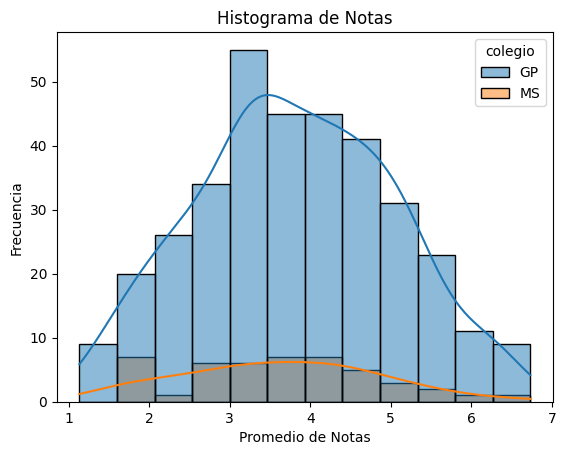

In [56]:
#Histograma colegio GP
sns.histplot(data = df, x='promedio' , bins= 'auto' , hue='colegio', kde=True)
plt.ylabel('Frecuencia')
plt.xlabel('Promedio de Notas')
plt.title('Histograma de Notas')


In [34]:
print(df['promedio'].describe())
print('\nla mediana es :',df['promedio'].median())

count    395.000000
mean       3.789620
std        1.214892
min        1.133333
25%        2.933333
50%        3.766667
75%        4.700000
max        6.733333
Name: promedio, dtype: float64

la mediana es : 3.766666666666667


- Podemos inferir que la media y mediana de la población son similares por lo que podria ser una distribución normal.
- Graficamente tiende a parecer una distribución normal.


## Cálculos y procedimientos
- El estudiante realiza correctamente los cálculos necesarios para 
obtener los valores estadísticos requeridos (por ejemplo, media, 
desviación estándar, valor crítico) en Python. Se muestra claramente el 
procedimiento utilizado para realizar los cálculos. Se muestran los 
pasos lógicos seguidos para llegar a los resultados

In [47]:
# Dividir los datos en dos grupos según el colegio
grupo_GP = df[df["colegio"] == "GP"]["promedio"]
grupo_MS = df[df["colegio"] == "MS"]["promedio"]

In [49]:
#Calculo de la media por colegio:
print('La media del colegio GP :', grupo_GP.mean())
print('La media del colegio MS :', grupo_MS.mean())

#Calculo de la desviacion estandar por colegio:
print('La desviación estandar del colegio GP :', grupo_GP.std())
print('La desviación estandar del colegio MS :', grupo_MS.std())

#Calculo de la mediana por colegio:
print('La mediana del colegio GP :', grupo_GP.median())
print('La mediana del colegio MS :', grupo_MS.median())

La media del colegio GP : 3.8115568290353385
La media del colegio MS : 3.623188405797101
La desviación estandar del colegio GP : 1.218447299194789
La desviación estandar del colegio MS : 1.1873587154983933
La mediana del colegio GP : 3.766666666666667
La mediana del colegio MS : 3.5666666666666664


## Interpretación y conclusión
- Se interpreta correctamente el valor del estadístico obtenido. Se 
interpreta correctamente el valor p obtenido. Se proporciona una 
conclusión adecuada y coherente con los resultados obtenidos

Anteriormente se evidenció que las muestras tenian una tendencia a ser una distribución normal, ahora se debe comprobar que las varianzas presenten igualdad para poder realizar la prueba t student.

In [43]:
#Para verificar que existe igual de varianzas se realizará la prueba de Levene.
stat, p_valor = levene(grupo_GP,grupo_MS)
print('Estadistico Levene :',stat)
print('Valor p de Levene :',p_valor)


Estadistico Levene : 0.10574550084994043
Valor p de Levene : 0.7452138541978364


- Podemos determinar que el valor p es mayor que el nivel de significancia (0.05), por lo tanto, no se puede afirmar con confianza que las varianzas de las muestras sean significativamente diferentes.
- Con esta conclusión podemos afirmar que podemos usar la prueba t Student, para estudiar  los colegios y determinar si existe una diferencia significativa en la media.

In [44]:
# Realizar la prueba de hipótesis
alpha = 0.05  # Nivel de significancia

# Hipótesis nula: No hay diferencia en el promedio de los estudiantes entre los colegios GP y MS
# Hipótesis alternativa: La nueva metodología de educación ha mejorado significativamente el promedio en el colegio GP en comparación con el colegio MS

prueba_t = stats.ttest_ind(grupo_GP, grupo_MS)
print('Valor t :',prueba_t.statistic)
print('Valor p :',prueba_t.pvalue)


Valor t : 0.9884408598788288
Valor p : 0.3235449446271107


- El valor p obtenido es menor que el nivel de significancia que se ha determinado para este estudio, por lo tanto, se rechaza nuestra hipotesis nula, lo que quiere decir que no existe una diferencia significativa en las medias de las muestras estudiadas, en conclusion, La nueva metodología implementada en el colegio GP no ha obtenido resultados significativos, se recomienda analizar la metodología y tomar nuevas decisiones.

## Análisis crítico de los resultados obtenidos.

- Al analizar el histograma generado previamente, se podía concluir que hay una gran diferencia en la cantidad de elementos entre las dos muestras a estudiar, esto podría indicar que se necesita una muestra más grande o que sean de similar magnitud las muestras a estudiar.

In [45]:
print('La cantidad de elementos del colegio GP es : ',grupo_GP.count())
print('La cantidad de elementos del colegio MS es : ',grupo_MS.count())

La cantidad de elementos del colegio GP es :  349
La cantidad de elementos del colegio MS es :  46


- También se recomienda para la comparación de las muestras se tome en consideración las inasistencias de los alumnos, puede ser una variable que influya en las notas, e impida una correcta implementación de la nueva metodología.

In [46]:
print('Inasistencias de colegio GP : ', df[df["colegio"] == "GP"]["ausencias"].sum())
print('Inasistencias de colegio MS : ', df[df["colegio"] == "MS"]["ausencias"].sum())

Inasistencias de colegio GP :  2082
Inasistencias de colegio MS :  173


- Aunque exista una diferencia significativa entre la cantidad de elementos de cada muestra, la proporpoción de inasistencias entre ambas muestras es mucho mayor, se recomienda realizar un estudio de esta hipotesis.